In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

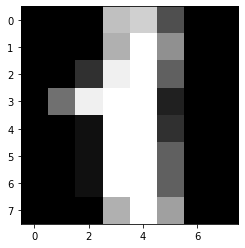

In [142]:
digits = load_digits()
X, y = digits.data, digits.target
plt.imshow(X[1].reshape(8,8), cmap='gray')

In [198]:
km = KMeans(n_clusters=10)
clusters = km.fit_predict(X)

In [199]:
pred = np.zeros(X.shape[0])
for i in range(10):
    bc = np.bincount(y[clusters == i])
    pred[clusters == i] = bc.argmax()
accuracy_score(y, pred)

0.7941012799109627

In [137]:
digit = 8
incorrect_indices = np.where((pred == digit) & (y != digit))[0]
correct_indices = np.where((pred == digit) & (y == digit))[0]

Text(0.5, 1.0, 'Real digit is 1')

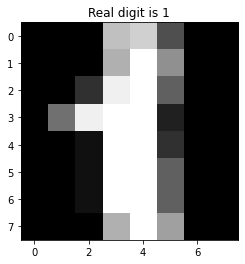

In [140]:
plt.imshow(X[incorrect_indices[0]].reshape(8, 8), cmap='gray')
plt.title(f'Real digit is {y[incorrect_indices[0]]}')

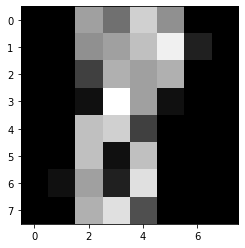

In [139]:
plt.imshow(X[correct_indices[0]].reshape(8, 8), cmap='gray')

In [264]:
dbscan = DBSCAN(eps=21)
clusters = dbscan.fit_predict(X)

In [267]:
pred = np.zeros(X.shape[0])
for i in range(10):
    bc = np.bincount(y[clusters == i])
    pred[clusters == i] = bc.argmax()
accuracy_score(y, pred)

0.7301057317751809

In [168]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

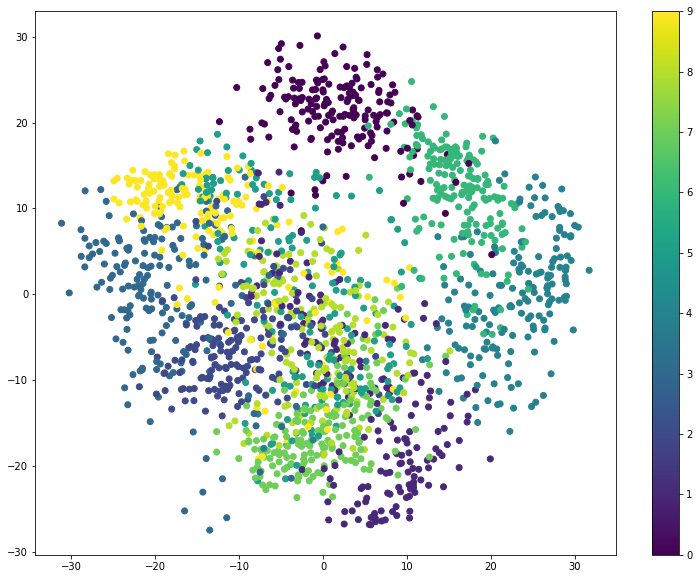

In [148]:
plt.figure(figsize=(13,10))
plt.scatter(X2[:,0], X2[:,1], c=y)
plt.colorbar()

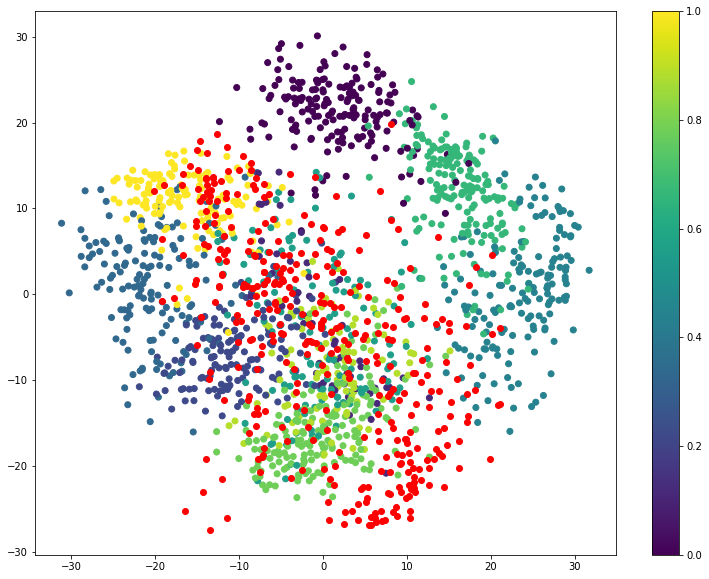

In [149]:
plt.figure(figsize=(13,10))
plt.scatter(X2[y == pred, 0], X2[y == pred, 1], c=y[y == pred])
plt.scatter(X2[y != pred, 0], X2[y != pred, 1], c='red')
plt.colorbar()

In [150]:
tsne = TSNE(n_components=2)
X2 = tsne.fit_transform(X)

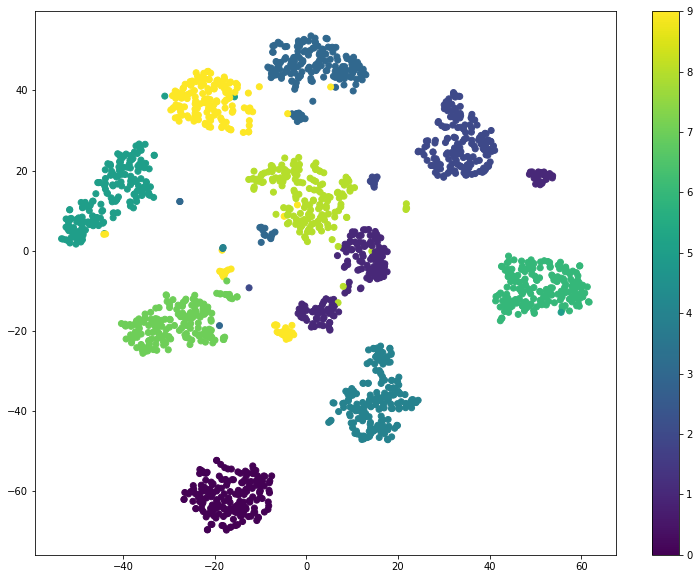

In [151]:
plt.figure(figsize=(13,10))
plt.scatter(X2[:,0], X2[:,1], c=y)
plt.colorbar()

In [158]:
tsne = TSNE(n_components=3)
X3 = tsne.fit_transform(X)

/home/vaaliferov/.local/lib/python3.9/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


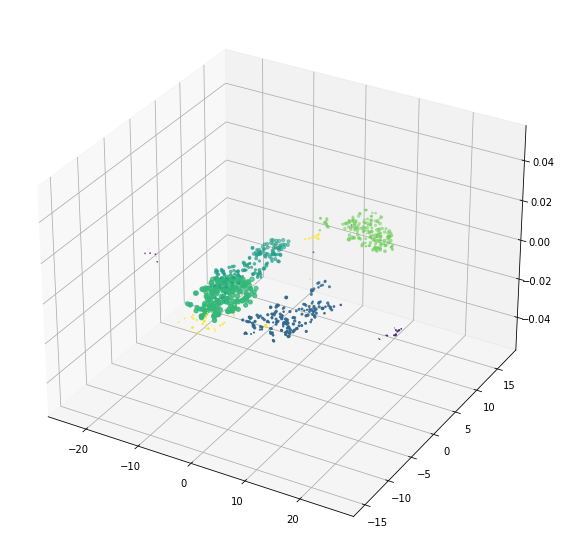

In [159]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X3[:,0], X3[:,1], X3[:,2], c=y)